In [1]:
import pandas as pd, datetime
import pandas_profiling as pp

import numpy as np
from time import time


import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats

In [2]:
#load our data
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TS/train.csv', index_col='date', parse_dates = True)
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TS/test.csv', index_col='date', parse_dates = True)

print(train.shape)
print(test.shape)

print(train.columns)
print(test.columns)

print(train.info())
print(test.info())

(73915, 4)
(2172, 3)
Index(['product_id', 'product_category_name', 'price', 'sales_quantity'], dtype='object')
Index(['product_id', 'product_category_name', 'price'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73915 entries, 2016-09-15 to 2018-08-12
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             73915 non-null  object 
 1   product_category_name  73915 non-null  object 
 2   price                  73915 non-null  float64
 3   sales_quantity         73915 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2172 entries, 2018-08-13 to 2018-09-03
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             2172 non-null   object 
 1   product_category_name  2172 

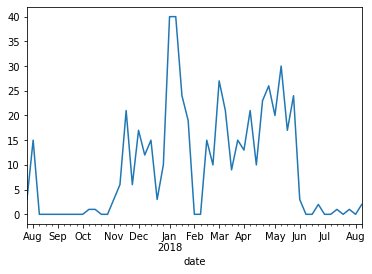

In [3]:
#lets have a look at some individual products 
sales_a = train[train.product_id == 'aca2eb7d00ea1a7b8ebd4e68314663af']['sales_quantity']

sales_a.resample('W').sum().plot()
print()

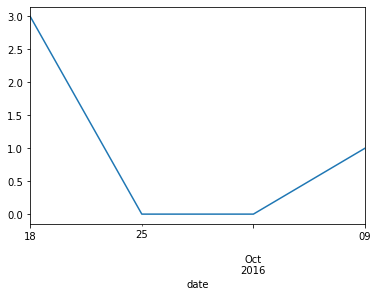

In [4]:
sales_b = train[train.product_id == '5a6b04657a4c5ee34285d1e4619a96b4']['sales_quantity']

sales_b.resample('W').sum().plot()
print()

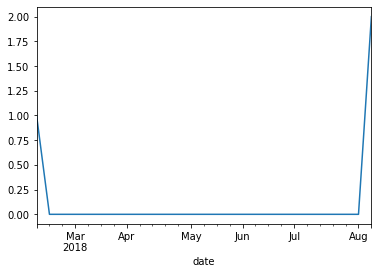

In [5]:
#We have products of different character in our dataset, some get sold very seldom.
sales_c = train[train.product_id == '309dd69eb83cea38c51709d62befe1a4']['sales_quantity']

sales_c.resample('W').sum().plot()
print()

In [6]:
#total sales per day
from collections import Counter
dateCount = Counter()
for day in train.index:
    dateCount[day] += 1
dateCount = pd.DataFrame.from_dict(dateCount, orient='index', columns=['Sales'])
dateCount.describe()

,Sales
count,593.000000
mean,124.645868
std,75.204132
min,1.000000
25%,73.000000
50%,113.000000
75%,166.000000
max,694.000000


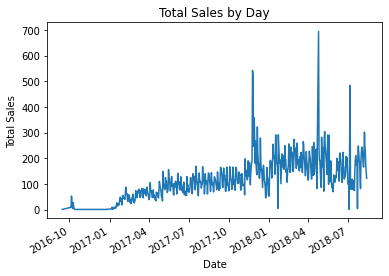

In [7]:
dateCount.plot(legend=None)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales by Day')
print()

In [8]:
train.describe()

,price,sales_quantity
count,73915.000000,73915.000000
mean,117.313311,1.234526
std,161.291891,0.731710
min,0.850000,1.000000
25%,39.990000,1.000000
50%,75.900000,1.000000
75%,134.900000,1.000000
max,4059.000000,22.000000


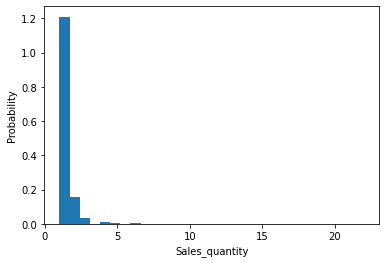

In [9]:
plt.hist(train.sales_quantity, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Sales_quantity');

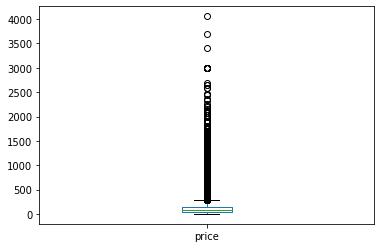

In [15]:
train['price'].plot(kind='box')
print()

In [11]:
train[train['price'] > 2500]

,product_id,product_category_name,price,sales_quantity
date,,,,
2017-01-31,8b502ca34e28d30605bc667b965b6abf,relogios_presentes,2999.00,1
2017-03-08,470433f95ba906e17efac3fce39e9ffd,informatica_acessorios,2999.89,1
2017-03-20,470433f95ba906e17efac3fce39e9ffd,informatica_acessorios,2999.89,1
2017-03-29,470433f95ba906e17efac3fce39e9ffd,informatica_acessorios,2999.89,1
2017-04-03,3ecf69ee1fe21cfd40b30cbea549e563,eletroportateis,2589.00,1
2017-04-06,3ecf69ee1fe21cfd40b30cbea549e563,eletroportateis,2589.00,1
2017-06-06,470433f95ba906e17efac3fce39e9ffd,informatica_acessorios,2999.89,1
2017-06-19,3ecf69ee1fe21cfd40b30cbea549e563,eletroportateis,2690.00,1
2017-06-27,a233df9a388d27dbdfd31731d4236db0,informatica_acessorios,2649.99,1


In [12]:
len(list(set(test.product_id) - set(test.product_id).intersection(set(train.product_id)))), len(list(set(test.product_id))), len(test)

(124, 1526, 2172)

In [13]:
#lets check how many categories we have

print(len(train['product_category_name'].unique()))
train['product_category_name'].unique()

73


array(['beleza_saude', 'utilidades_domesticas', 'moveis_decoracao',
       'brinquedos', 'automotivo', 'perfumaria', 'esporte_lazer',
       'informatica_acessorios', 'telefonia', 'moveis_escritorio',
       'consoles_games', 'cool_stuff', 'pet_shop', 'market_place',
       'fashion_bolsas_e_acessorios', 'eletronicos', 'cama_mesa_banho',
       'telefonia_fixa', 'climatizacao', 'Other',
       'industria_comercio_e_negocios', 'bebes', 'relogios_presentes',
       'ferramentas_jardim', 'livros_interesse_geral', 'moveis_quarto',
       'musica', 'eletroportateis', 'papelaria', 'fashion_calcados',
       'agro_industria_e_comercio', 'malas_acessorios',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'fashion_roupa_feminina', 'casa_conforto_2', 'moveis_sala',
       'eletrodomesticos_2', 'alimentos', 'dvds_blu_ray',
       'tablets_impressao_imagem', 'instrumentos_musicais',
       'fashion_underwear_e_moda_praia', 'construcao_ferramentas_jardim',
       'casa_construcao', 

In [14]:
#amount of products for dif category
cat = pd.DataFrame(train.groupby(['product_category_name'])['product_id'].count().sort_values(ascending=False))

print(cat.describe())
cat

        product_id
count    73.000000
mean   1012.534247
std    1699.669037
min       3.000000
25%      52.000000
50%     179.000000
75%    1115.000000
max    7645.000000


,product_id
product_category_name,
cama_mesa_banho,7645
beleza_saude,6424
esporte_lazer,5810
informatica_acessorios,5095
moveis_decoracao,4695
...,...
la_cuisine,6
pc_gamer,6
portateis_cozinha_e_preparadores_de_alimentos,6
